<img src =  'https://i0.wp.com/appliedmachinelearning.blog/wp-content/uploads/2017/06/banner22.png?fit=434%2C245&ssl=1' />

# Gender Recognition by Voice

### By: *Sheetal Kumari*
     Nov 19 batch

# Table of Content

1. [Description of the Dataset](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Installing & Importing Libraries](#section3)<br>
4. [Pandas Profiling before Data Preprocessing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Dummification on categorical variable](#section6)<br>
7. [ Modelling and Prediction](#section7)<br>
    7.1 [Logistic Regression](#section701)<br>
    7.2 [Decision Tree](#section702)<br>
    7.3 [Decision Tree Algorithm Grid Search](#section703)<br>
    7.4 [Random Forest Algorithm](#section704)<br>
    7.5 [KNN](#section705)<br>
    7.6 [SVM](#section706)<br>
    7.7 [Naive Bayes](#section707)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Description of the Dataset

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
22. label: male or female

<a id=section2></a>
## 2. Problem Statement

To make an algorithm which will predict the gender based on voices.

<a id=section3></a>
## 3. Installing & Importing Libraries

In [1]:
import numpy as np                                                
import pandas as pd                                                
import seaborn as sns                                              
%matplotlib inline
sns.set()

from subprocess import check_output
import pandas_profiling
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
voice = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')
voice

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

In [3]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [4]:
voice.shape

(3168, 21)

In [5]:
voice.describe(include = 'all')

meanfreq           sd       median          Q25          Q75  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.180907     0.057126     0.185621     0.140456     0.224765   
std        0.029918     0.016652     0.036360     0.048680     0.023639   
min        0.039363     0.018363     0.010975     0.000229     0.042946   
25%        0.163662     0.041954     0.169593     0.111087     0.208747   
50%        0.184838     0.059155     0.190032     0.140286     0.225684   
75%        0.199146     0.067020     0.210618     0.175939     0.243660   
max        0.251124     0.115273     0.261224     0.247347     0.273469   

                IQR         skew         kurt       sp.ent          sfm  ...  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean       0.084309     3.140168    36.568461     0.895127     0.408216  ...   
std        0.042783     4.240529   134.928661     0.044980     0.177521  ...   
min        0.014558     0.141735     2.068455     0.738651     0.036876  ...   
25%        0.042560     1.649569     5.669547     0.861811     0.258041  ...   
50%        0.094280     2.197101     8.318463     0.901767     0.396335  ...   
75%        0.114175     2.931694    13.648905     0.928713     0.533676  ...   
max        0.252225    34.725453  1309.612887     0.981997     0.842936  ...   

           centroid      meanfun       minfun       maxfun      meandom  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.180907     0.142807     0.036802     0.258842     0.829211   
std        0.029918     0.032304     0.019220     0.030077     0.525205   
min        0.039363     0.055565     0.009775     0.103093     0.007812   
25%        0.163662     0.116998     0.018223     0.253968     0.419828   
50%        0.184838     0.140519     0.046110     0.271186     0.765795   
75%        0.199146     0.169581     0.047904     0.277457     1.177166   
max        0.251124     0.237636     0.204082     0.279114     2.957682   

             mindom       maxdom      dfrange      modindx   label  
count   3168.000000  3168.000000  3168.000000  3168.000000    3168  
unique          NaN          NaN          NaN          NaN       2  
top             NaN          NaN          NaN          NaN  female  
freq            NaN          NaN          NaN          NaN    1584  
mean       0.052647     5.047277     4.994630     0.173752     NaN  
std        0.063299     3.521157     3.520039     0.119454     NaN  
min        0.004883     0.007812     0.000000     0.000000     NaN  
25%        0.007812     2.070312     2.044922     0.099766     NaN  
50%        0.023438     4.992188     4.945312     0.139357     NaN  
75%        0.070312     7.007812     6.992188     0.209183     NaN  
max        0.458984    21.867188    21.843750     0.932374     NaN  

[11 rows x 21 columns]

In [6]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

There is no null values in the data set.

In [7]:
voice[voice.duplicated(keep=False)]
voice.drop_duplicates(inplace=True)

In [8]:
voice.label.value_counts()

female    1583
male      1583
Name: label, dtype: int64

In [9]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

<a id=section4></a>
## 4. Pandas Profiling before Data Preprocessing

In [10]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas_profiling

In [12]:
profile =voice.profile_report(title='output')
profile.to_file(output_file='output.html')
pandas_profiling.ProfileReport(voice)

<a id=section5></a>
## 5. Exploratory Data Analysis

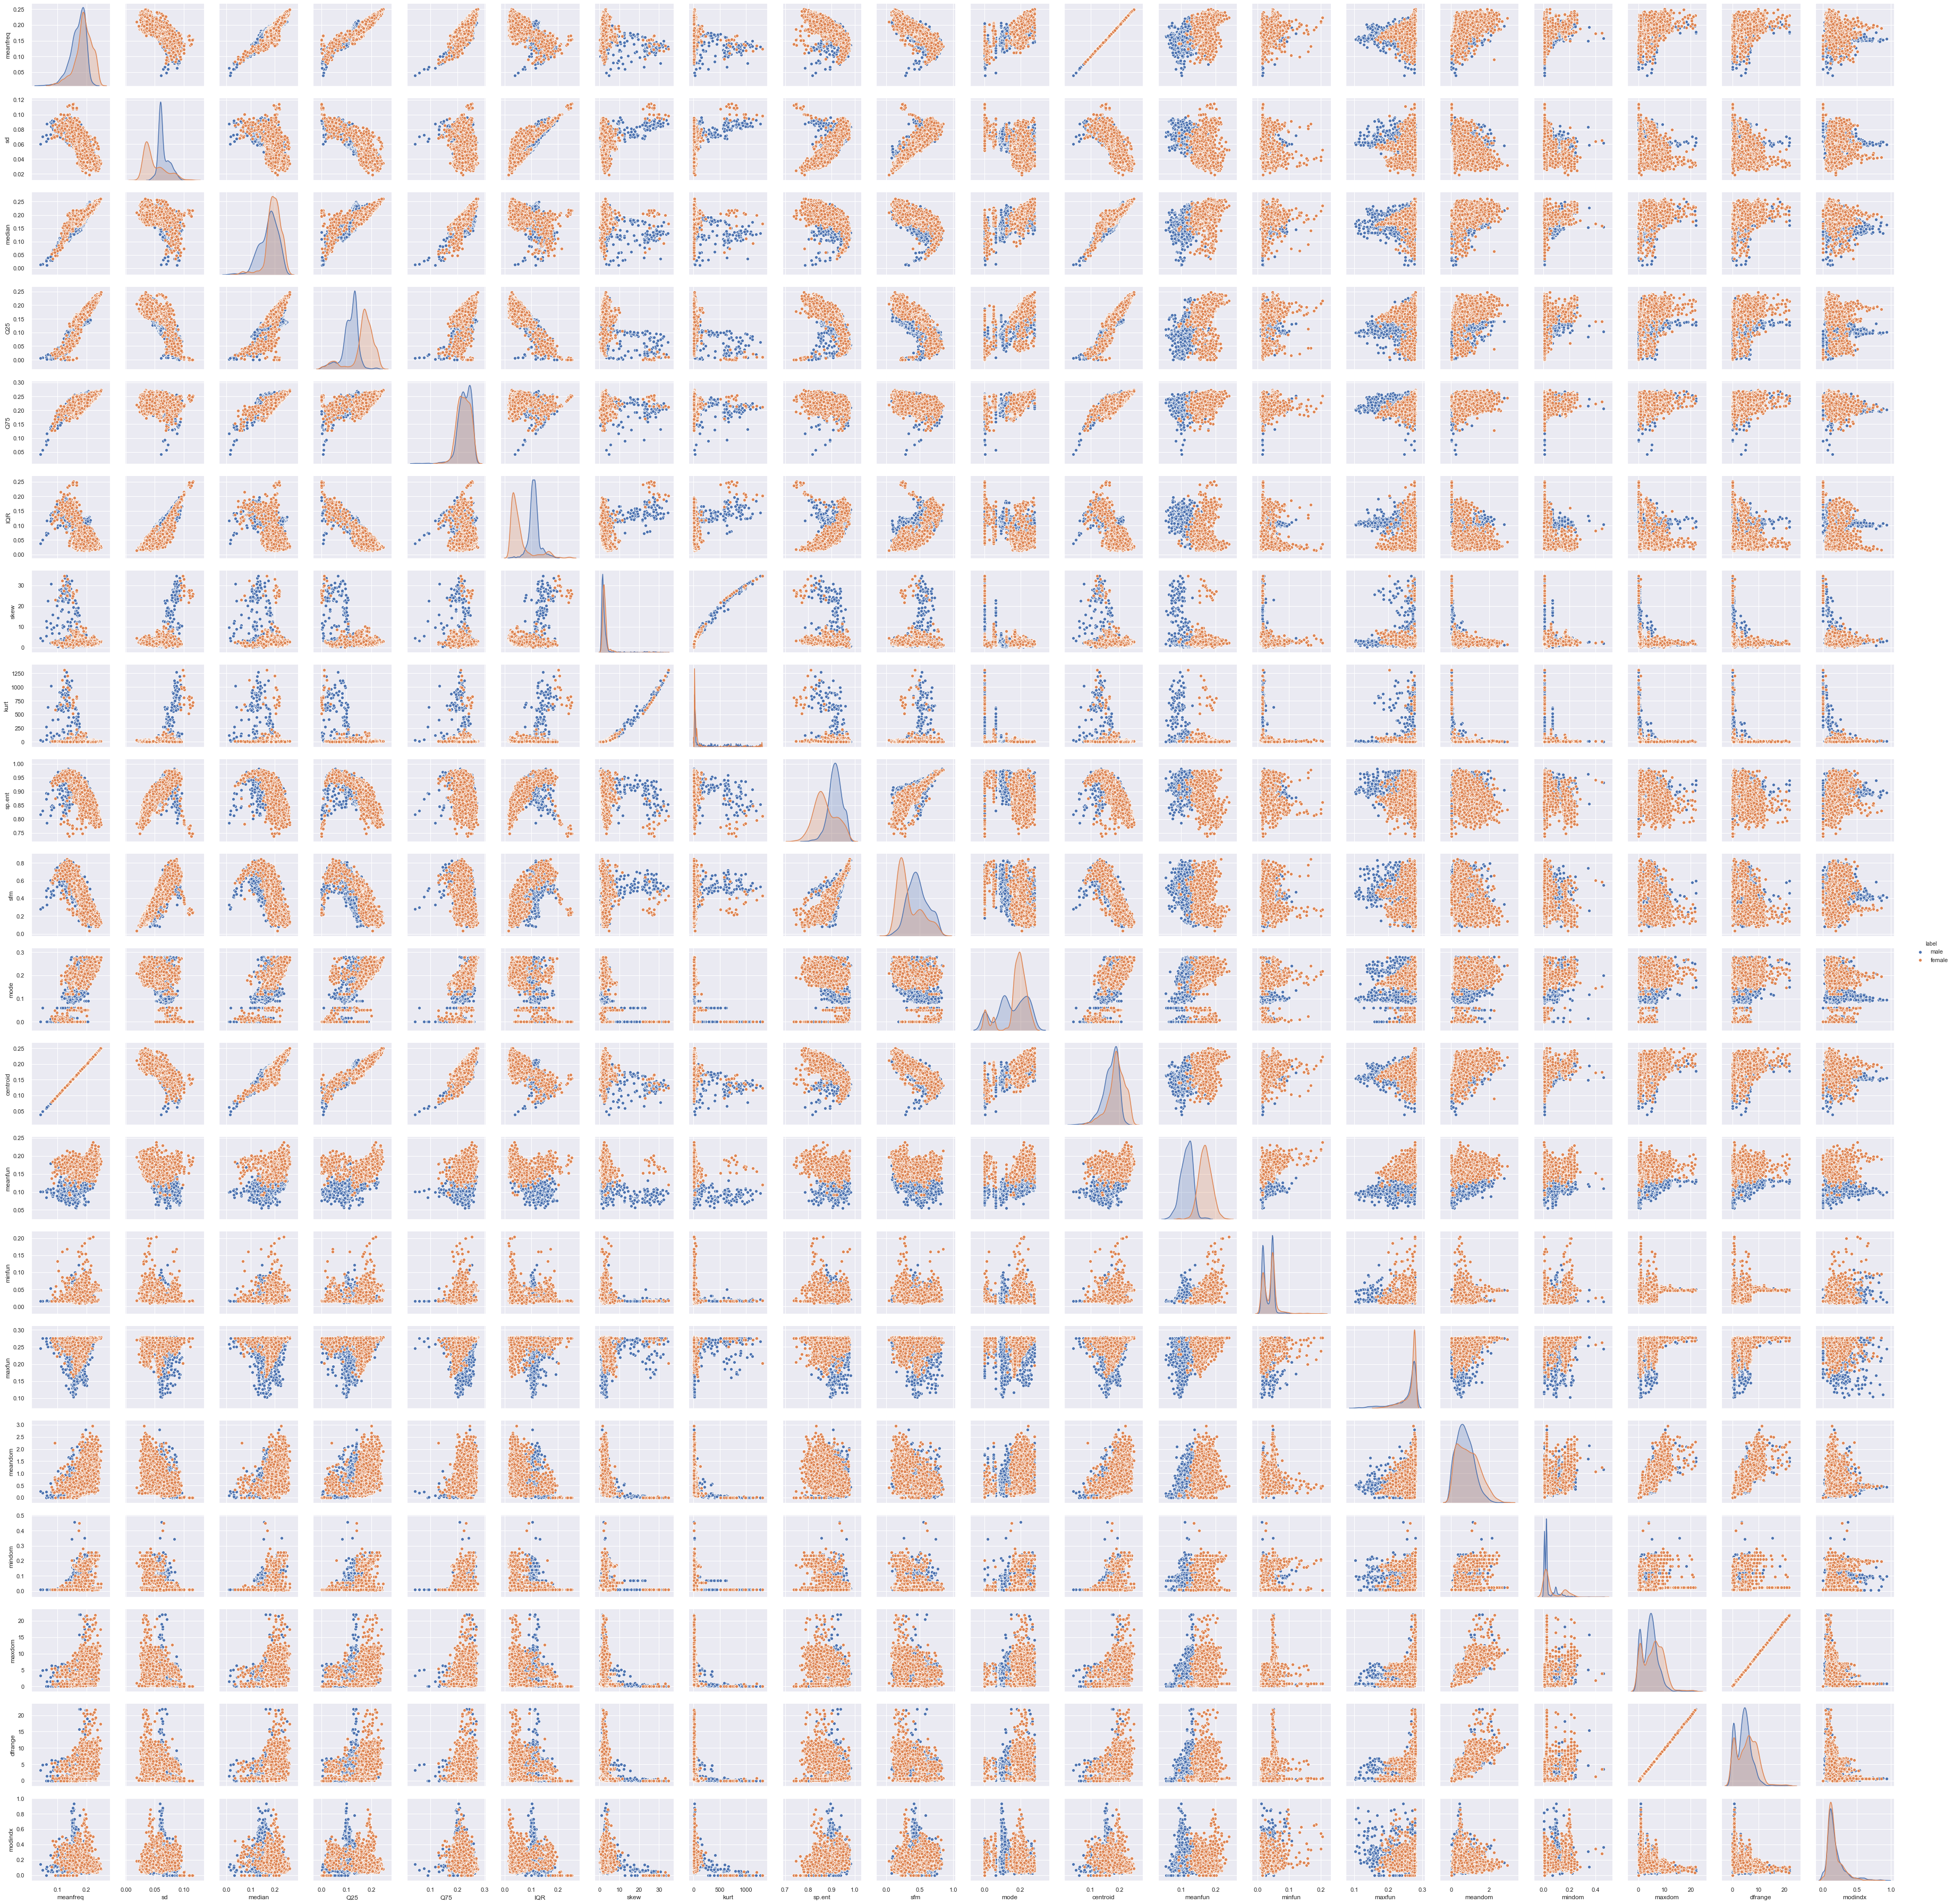

In [138]:
sns.pairplot(voice, hue='label')

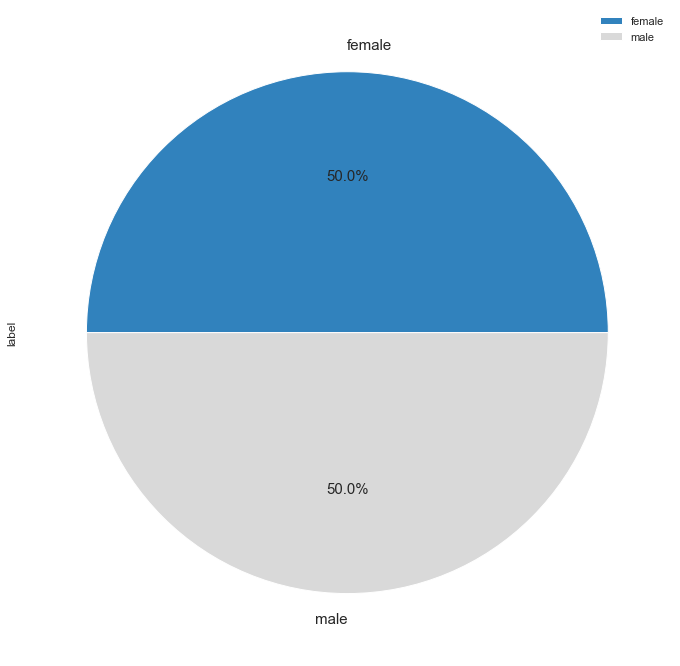

In [139]:
voice['label'].value_counts().plot(kind='pie', autopct= '%3.1f%%',figsize=(12,12), legend=True, cmap='tab20c', fontsize=15)

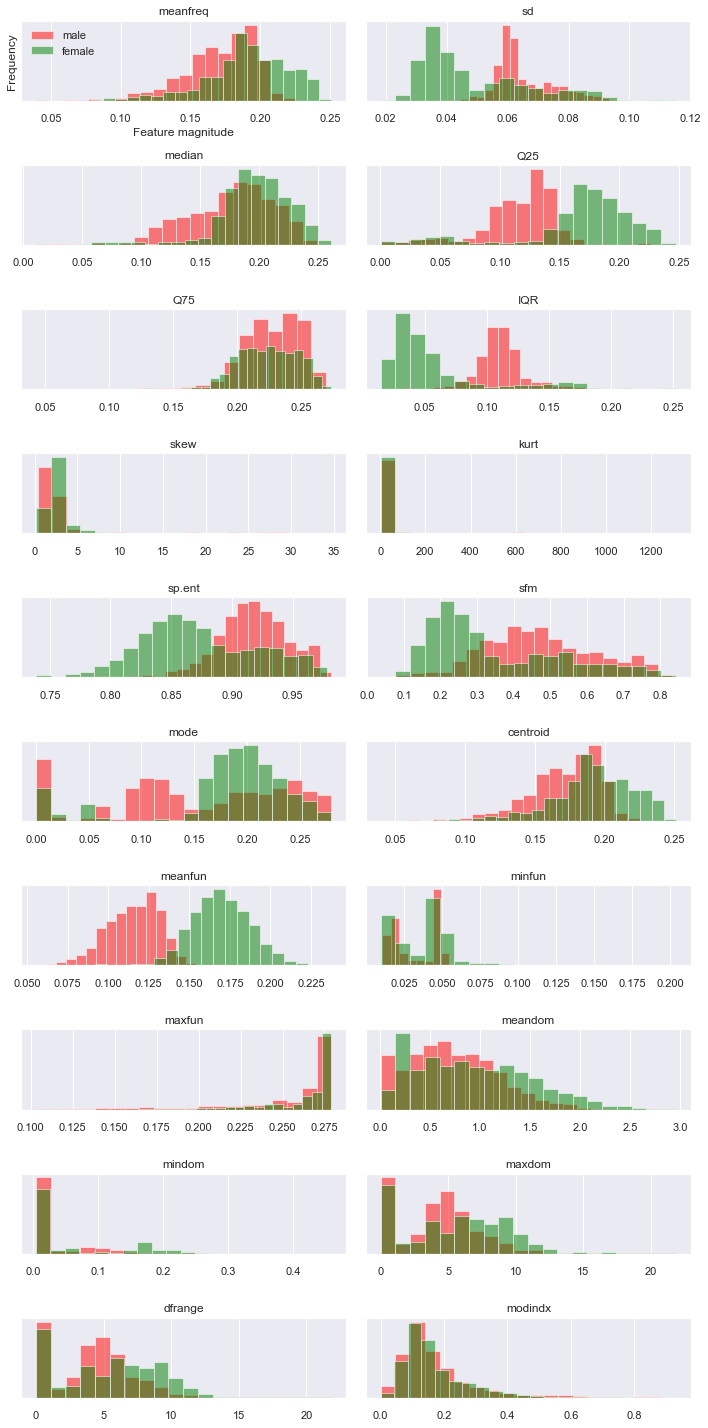

In [140]:
male = voice.loc[voice['label']=='male']
female = voice.loc[voice['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color='red' ,alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20,color = 'green' , alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()

The above plot shows the variation in voices for male and female.
In most of the cases the range of male voice is less as comapred to female but with higher frequency compared to female.

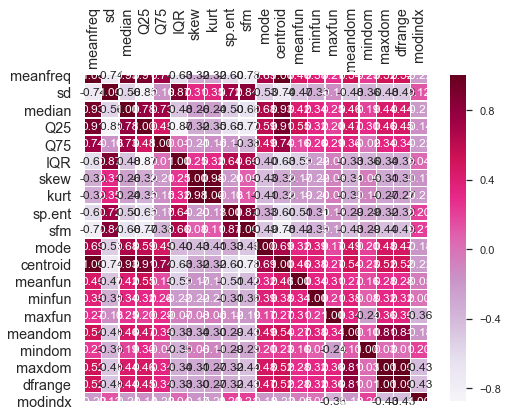

In [141]:
fig,ax = plt.subplots(figsize=(8,6))
corr_voice= voice.corr()
sns.heatmap(corr_voice, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5, ax=ax, cbar=True )
ticks = plt.setp(ax.get_yticklabels(), fontsize='large', rotation=0)
ticks = plt.setp(ax.get_xticklabels(), fontsize='large', position=(1, 1.25)) 

From heat map we can see the correlation among columns and can drop some which are highly correlated.
The columns which can be dropped due to hihg correlation are: median, Q25, IQR, kurt, sp.ent, maxdom, dfrange

In [142]:
voice = voice[['meanfreq','sd','centroid','Q75','skew', 'sfm', 'mode','meanfun','minfun','maxfun', 'mindom','meandom','modindx', 'label']]
voice

meanfreq        sd  centroid       Q75       skew       sfm      mode  \
0     0.059781  0.064241  0.059781  0.090193  12.863462  0.491918  0.000000   
1     0.066009  0.067310  0.066009  0.092666  22.423285  0.513724  0.000000   
2     0.077316  0.083829  0.077316  0.131908  30.757155  0.478905  0.000000   
3     0.151228  0.072111  0.151228  0.207955   1.232831  0.727232  0.083878   
4     0.135120  0.079146  0.135120  0.206045   1.101174  0.783568  0.104261   
...        ...       ...       ...       ...        ...       ...       ...   
3163  0.131884  0.084734  0.131884  0.201144   1.762129  0.763182  0.200836   
3164  0.116221  0.089221  0.116221  0.204911   0.693730  0.709570  0.013683   
3165  0.142056  0.095798  0.142056  0.224360   1.876502  0.654196  0.008006   
3166  0.143659  0.090628  0.143659  0.219943   1.591065  0.675470  0.212202   
3167  0.165509  0.092884  0.165509  0.250827   1.705029  0.601529  0.267702   

       meanfun    minfun    maxfun    mindom   meandom   modindx   label  
0     0.084279  0.015702  0.275862  0.007812  0.007812  0.000000    male  
1     0.107937  0.015826  0.250000  0.007812  0.009014  0.052632    male  
2     0.098706  0.015656  0.271186  0.007812  0.007990  0.046512    male  
3     0.088965  0.017798  0.250000  0.007812  0.201497  0.247119    male  
4     0.106398  0.016931  0.266667  0.007812  0.712812  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.182790  0.083770  0.262295  0.007812  0.832899  0.161929  female  
3164  0.188980  0.034409  0.275862  0.039062  0.909856  0.277897  female  
3165  0.209918  0.039506  0.275862  0.007812  0.494271  0.194759  female  
3166  0.172375  0.034483  0.250000  0.007812  0.791360  0.311002  female  
3167  0.185607  0.062257  0.271186  0.007812  0.227022  0.350000  female  

[3166 rows x 14 columns]

<a id=section6></a>
## 6. Dummification on categorical variable

In [143]:
voice = pd.get_dummies(voice,drop_first=True)
voice.head()

meanfreq        sd  centroid       Q75       skew       sfm      mode  \
0  0.059781  0.064241  0.059781  0.090193  12.863462  0.491918  0.000000   
1  0.066009  0.067310  0.066009  0.092666  22.423285  0.513724  0.000000   
2  0.077316  0.083829  0.077316  0.131908  30.757155  0.478905  0.000000   
3  0.151228  0.072111  0.151228  0.207955   1.232831  0.727232  0.083878   
4  0.135120  0.079146  0.135120  0.206045   1.101174  0.783568  0.104261   

    meanfun    minfun    maxfun    mindom   meandom   modindx  label_male  
0  0.084279  0.015702  0.275862  0.007812  0.007812  0.000000           1  
1  0.107937  0.015826  0.250000  0.007812  0.009014  0.052632           1  
2  0.098706  0.015656  0.271186  0.007812  0.007990  0.046512           1  
3  0.088965  0.017798  0.250000  0.007812  0.201497  0.247119           1  
4  0.106398  0.016931  0.266667  0.007812  0.712812  0.208274           1


### Preparing x and y

splitting the data set into x (__Explanatory Variable__) and y (__Target Variable__)

In [144]:
x= voice[['meanfreq','sd','centroid','Q75','skew','sfm','mode','meanfun','minfun','maxfun','mindom','meandom','modindx']]
x

meanfreq        sd  centroid       Q75       skew       sfm      mode  \
0     0.059781  0.064241  0.059781  0.090193  12.863462  0.491918  0.000000   
1     0.066009  0.067310  0.066009  0.092666  22.423285  0.513724  0.000000   
2     0.077316  0.083829  0.077316  0.131908  30.757155  0.478905  0.000000   
3     0.151228  0.072111  0.151228  0.207955   1.232831  0.727232  0.083878   
4     0.135120  0.079146  0.135120  0.206045   1.101174  0.783568  0.104261   
...        ...       ...       ...       ...        ...       ...       ...   
3163  0.131884  0.084734  0.131884  0.201144   1.762129  0.763182  0.200836   
3164  0.116221  0.089221  0.116221  0.204911   0.693730  0.709570  0.013683   
3165  0.142056  0.095798  0.142056  0.224360   1.876502  0.654196  0.008006   
3166  0.143659  0.090628  0.143659  0.219943   1.591065  0.675470  0.212202   
3167  0.165509  0.092884  0.165509  0.250827   1.705029  0.601529  0.267702   

       meanfun    minfun    maxfun    mindom   meandom   modindx  
0     0.084279  0.015702  0.275862  0.007812  0.007812  0.000000  
1     0.107937  0.015826  0.250000  0.007812  0.009014  0.052632  
2     0.098706  0.015656  0.271186  0.007812  0.007990  0.046512  
3     0.088965  0.017798  0.250000  0.007812  0.201497  0.247119  
4     0.106398  0.016931  0.266667  0.007812  0.712812  0.208274  
...        ...       ...       ...       ...       ...       ...  
3163  0.182790  0.083770  0.262295  0.007812  0.832899  0.161929  
3164  0.188980  0.034409  0.275862  0.039062  0.909856  0.277897  
3165  0.209918  0.039506  0.275862  0.007812  0.494271  0.194759  
3166  0.172375  0.034483  0.250000  0.007812  0.791360  0.311002  
3167  0.185607  0.062257  0.271186  0.007812  0.227022  0.350000  

[3166 rows x 13 columns]

In [145]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(3166, 13)


In [146]:
y = voice.label_male
y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label_male, Length: 3166, dtype: uint8

In [147]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3166,)


### Splitting x and y into training and test datasets.

splitting x and y into 80-20 ratio.

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [149]:
print(x_train.shape)
print(x_test.shape)

(2532, 13)
(634, 13)


In [150]:
print(y_train.shape)
print(y_test.shape)

(2532,)
(634,)


<a id=section7></a>
## 7. Modelling and Prediction

<a id=section701></a>
### 7.1 Logistic Regression

In [151]:
import time
start_time = time.process_time()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test) 

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_log = accuracy_score(y_test, y_pred_test)
print('Accuracy score for Logistic Regression:', Accuracy_log)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual Female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nReport:')
from sklearn.metrics import classification_report
logistic_report = classification_report(y_test, y_pred_test)
print(logistic_report)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_log = end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_log: " , Processtime_log) 

Accuracy:
Accuracy score for Logistic Regression: 0.8470031545741324
------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               249                60
Actual Female              37               288
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       309
           1       0.83      0.89      0.86       325

    accuracy                           0.85       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.85      0.85      0.85       634

------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  616.375 
End Time:  616.4375 
Processtime_log:  0.0625


### **Observations:**

 1.We can see that model performed 84% accurate.
 
 2.From Confusion Matrix we can predict 249 + 288 = __537 correct predictions__ & 60 + 37 = __97 false predictions__.

<a id=section702></a>
### 7.2 Decision Tree

In [152]:
import time
start_time = time.process_time()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( criterion='gini')
dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_dt =  accuracy_score(y_test,y_pred_test)
print('Accuracy score for Decision Tree:', Accuracy_dt)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual Female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nReport:')
Decision_tree_report = classification_report(y_test, y_pred_test)
print(Decision_tree_report)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_dt = end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_dt: " , Processtime_dt) 

Accuracy:
Accuracy score for Decision Tree: 0.9574132492113565
------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               293                16
Actual Female              11               314
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       309
           1       0.95      0.97      0.96       325

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  616.453125 
End Time:  616.53125 
Processtime_dt:  0.078125


### **Observations:**

 1.We can see that model performed 95% accurate.
 
 2.From Confusion Matrix we can predict 293 + 314 = __607 correct predictions__ & 11 + 16 = __27 false predictions__.

<a id=section703></a>
### 7.3 Decision Tree Algorithm Grid Search

In [153]:
import time
start_time = time.process_time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state = 0)
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),'max_features': ['sqrt', 'log2', None] }]                        
grid_search = GridSearchCV(dtc,tree_para, cv=10, refit='AUC')

grid_search.fit(x_train, y_train)
y_pred_train = grid_search.predict(x_train) 
y_pred_test = grid_search.predict(x_test)

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_dtc =  accuracy_score(y_test,y_pred_test)
print('Accuracy score for Decision Tree Grid Search:', Accuracy_dtc)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual Female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nReport:')
Decision_tree_class_report = classification_report(y_test, y_pred_test)
print(Decision_tree_report)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_dtc = end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_dtc: " , Processtime_dtc)  

Accuracy:
Accuracy score for Decision Tree Grid Search: 0.9589905362776026
------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               290                19
Actual Female               7               318
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       309
           1       0.95      0.97      0.96       325

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  616.5625 
End Time:  718.96875 
Processtime_dtc:  102.40625


### **Observations:**

 1.We can see that model performed 95% accurate.
 
 2.From Confusion Matrix we can predict 290 + 318 = __608 correct predictions__ & 7 + 19 = __26 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ from __0.957 to 0.958__ and the __number of correct predictions increased from 607 to 608__ and number of false predictions __decreased__ from __27 to 26__. 


<a id=section704></a>
### 7.4  Random Forest Algorithm

In [154]:
import time
start_time = time.process_time()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_rf =  accuracy_score(y_test,y_pred_test)
print('Accuracy score for Random Forest:', Accuracy_rf)

print('-' * 60, '\n\nReport:')
Random_Forest_report = classification_report(y_test, y_pred_test)
print(Random_Forest_report)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_rf = end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_rf: " , Processtime_rf)  

Accuracy:
Accuracy score for Random Forest: 0.9763406940063092
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       309
           1       0.97      0.99      0.98       325

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               298                11
Actual female               4               321
------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  718.984375 
End Time:  719.1875 
Processtime_rf:  0.203125


### **Observations:**

 1.We can see that model performed 97% accurate.
 
 2.From Confusion Matrix we can predict 298 + 321 = __619 correct predictions__ & 4 + 11 = __15 false predictions__.

<a id=section705></a>
### 7.5 KNN

In [155]:
import time
start_time = time.process_time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

knn.fit(x_train, y_train)
y_pred_test = knn.predict(x_test)

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_knn = accuracy_score(y_test,y_pred_test)
print('Accuracy score for the KNN model:', Accuracy_knn)

print('-' * 60, '\n\nReport:')
KNN_report = classification_report(y_test, y_pred_test)
print(KNN_report)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_KNN= end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_KNN: " , Processtime_KNN)  

Accuracy:
Accuracy score for the KNN model: 0.805993690851735
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       309
           1       0.79      0.84      0.82       325

    accuracy                           0.81       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.81      0.81      0.81       634

------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               238                71
Actual female              52               273
------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  719.203125 
End Time:  719.3125 
Processtime_KNN:  0.109375


### **Observations:**

 1.We can see that model performed 80% accurate.
 
 2.From Confusion Matrix we can predict 238 + 273 = __511 correct predictions__ & 52 + 71 = __123 false predictions__.

<a id=section706></a>
### 7.6 SVM

In [156]:
import time
start_time = time.process_time()

from sklearn import svm
cls = svm.SVC(kernel="linear")

cls.fit(x_train,y_train)
y_pred_test = cls.predict(x_test)

print("Accuracy:")
from sklearn.metrics import accuracy_score
Accuracy_svm = accuracy_score(y_test,y_pred_test)
print('Accuracy score for the svm model:', Accuracy_svm)

print('-' * 60, '\n\nReport:')
SVM_report = classification_report(y_test, y_pred_test)
print(SVM_report)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_SVM= end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_SVM: " , Processtime_SVM)

Accuracy:
Accuracy score for the svm model: 0.9526813880126183
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       309
           1       0.93      0.98      0.96       325

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               285                24
Actual female               6               319
------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  719.328125 
End Time:  719.875 
Processtime_SVM:  0.546875


### **Observations:**

 1.We can see that model performed 95% accurate.
 
 2.From Confusion Matrix we can predict 285 + 319 = __604 correct predictions__ & 6 + 24 = __30 false predictions__.

<a id=section707></a>
### 7.7 Naive Bayes

In [157]:
import time
start_time = time.process_time()

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

gnb.fit(x_train, y_train)   
y_pred_test = gnb.predict(x_test) 
 
print("Accuracy:")    
from sklearn import metrics 
Accuracy_gnb = accuracy_score(y_test,y_pred_test)
print("Accuracy score for Naive Bayes model:", Accuracy_gnb)

print('-' * 60, '\n\nReport:')
Naive_Bayes_report = classification_report(y_test, y_pred_test)
print(Naive_Bayes_report)

print('-' * 60, '\n\nConfusion Matrix:')
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Male','Actual female']
confusion_matrix.columns = ['Predicted Male','Predicted Female']
print(confusion_matrix)

print('-' * 60, '\n\nProcessing Time in seconds:')
end_time=time.process_time()
Processtime_Naive_Bayes= end_time - start_time
print('Start Time: ' , start_time , '\nEnd Time: ' , end_time , "\nProcesstime_Naive bayes: " , Processtime_Naive_Bayes)

Accuracy:
Accuracy score for Naive Bayes model: 0.8690851735015773
------------------------------------------------------------ 

Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       309
           1       0.88      0.87      0.87       325

    accuracy                           0.87       634
   macro avg       0.87      0.87      0.87       634
weighted avg       0.87      0.87      0.87       634

------------------------------------------------------------ 

Confusion Matrix:
               Predicted Male  Predicted Female
Actual Male               269                40
Actual female              43               282
------------------------------------------------------------ 

Processing Time in seconds:
Start Time:  719.890625 
End Time:  719.9375 
Processtime_Naive bayes:  0.046875


### **Observations:**

 1.We can see that model performed 86% accurate.
 
 2.From Confusion Matrix we can predict 269 + 282 = __551 correct predictions__ & 43 + 40 = __83 false predictions__.

In [158]:
print('Final Report\n\n Logistic Regression:\n Accuracy = {}\n Processing Time = {}\n\nDecision Tree:\n Accuracy = {}\n Processing Time = {}\n\nDecision Tree Grid Search:\n Accuracy = {}\n Processing Time = {}\n\nRandom Forest:\n Accuracy = {}\n Processing Time = {}\n\nKNN:\n Accuracy = {}\n Processing Time = {}\n\nSVM:\n Accuracy = {}\n Processing Time = {}\n\nNaive Bayes:\n Accuracy = {}\n Processing Time = {}'.format(Accuracy_log,Processtime_log,Accuracy_dt,Processtime_dt,Accuracy_dtc,Processtime_dtc,Accuracy_rf,Processtime_rf,Accuracy_knn,Processtime_KNN,Accuracy_svm,Processtime_SVM,Accuracy_gnb,Processtime_Naive_Bayes))



Final Report

 Logistic Regression:
 Accuracy = 0.8470031545741324
 Processing Time = 0.0625

Decision Tree:
 Accuracy = 0.9574132492113565
 Processing Time = 0.078125

Decision Tree Grid Search:
 Accuracy = 0.9589905362776026
 Processing Time = 102.40625

Random Forest:
 Accuracy = 0.9763406940063092
 Processing Time = 0.203125

KNN:
 Accuracy = 0.805993690851735
 Processing Time = 0.109375

SVM:
 Accuracy = 0.9526813880126183
 Processing Time = 0.546875

Naive Bayes:
 Accuracy = 0.8690851735015773
 Processing Time = 0.046875


<a id=section8></a>
### 8. Conclusion

1.We have compared the performance of the all models using various model evaluation techinques.

2.As per the Report Random Forest has highest accuracy 97% within 0.2 seconds.


